In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(303.9796)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 674.58580  validloss 1064.34612±0.00000  bestvalidloss 1064.34612  last_update 0
train: iter 1  trainloss 235.29732  validloss 767.41985±0.00000  bestvalidloss 767.41985  last_update 0
train: iter 2  trainloss -109.86995  validloss -12.48948±0.00000  bestvalidloss -12.48948  last_update 0
train: iter 3  trainloss -397.95858  validloss -297.35947±0.00000  bestvalidloss -297.35947  last_update 0
train: iter 4  trainloss -551.59015  validloss -558.04159±0.00000  bestvalidloss -558.04159  last_update 0
train: iter 5  trainloss -667.27192  validloss -540.78700±0.00000  bestvalidloss -558.04159  last_update 1
train: iter 6  trainloss -774.59714  validloss -754.32381±0.00000  bestvalidloss -754.32381  last_update 0
train: iter 7  trainloss -789.91110  validloss -705.72815±0.00000  bestvalidloss -754.32381  last_update 1
train: iter 8  trainloss -839.96869  validloss -917.21870±0.00000  bestvalidloss -917.21870  last_update 0
train: iter 9  trainloss

train: iter 75  trainloss -1570.29905  validloss -1588.29250±0.00000  bestvalidloss -1643.88758  last_update 4
train: iter 76  trainloss -1572.98740  validloss -1498.09268±0.00000  bestvalidloss -1643.88758  last_update 5
train: iter 77  trainloss -1595.25038  validloss -1486.95387±0.00000  bestvalidloss -1643.88758  last_update 6
train: iter 78  trainloss -1666.73355  validloss -1628.14987±0.00000  bestvalidloss -1643.88758  last_update 7
train: iter 79  trainloss -1656.97860  validloss -1695.37507±0.00000  bestvalidloss -1695.37507  last_update 0
train: iter 80  trainloss -1560.12282  validloss -1622.78748±0.00000  bestvalidloss -1695.37507  last_update 1
train: iter 81  trainloss -1591.79169  validloss -1608.58890±0.00000  bestvalidloss -1695.37507  last_update 2
train: iter 82  trainloss -1541.84200  validloss -1357.27310±0.00000  bestvalidloss -1695.37507  last_update 3
train: iter 83  trainloss -1714.32925  validloss -1693.29493±0.00000  bestvalidloss -1695.37507  last_update 4
t

train: iter 149  trainloss -1874.60366  validloss -1877.21951±0.00000  bestvalidloss -1913.68180  last_update 5
train: iter 150  trainloss -1646.08826  validloss -1696.02517±0.00000  bestvalidloss -1913.68180  last_update 6
train: iter 151  trainloss -1880.83571  validloss -1799.21061±0.00000  bestvalidloss -1913.68180  last_update 7
train: iter 152  trainloss -1901.90379  validloss -1849.33004±0.00000  bestvalidloss -1913.68180  last_update 8
train: iter 153  trainloss -1895.31542  validloss -1866.57547±0.00000  bestvalidloss -1913.68180  last_update 9
train: iter 154  trainloss -1880.54166  validloss -1760.14192±0.00000  bestvalidloss -1913.68180  last_update 10
train: iter 155  trainloss -1909.18823  validloss -1902.66487±0.00000  bestvalidloss -1913.68180  last_update 11
train: iter 156  trainloss -1910.18237  validloss -1858.19767±0.00000  bestvalidloss -1913.68180  last_update 12
train: iter 157  trainloss -1903.14185  validloss -1864.02241±0.00000  bestvalidloss -1913.68180  las

train: iter 222  trainloss -1901.88302  validloss -1886.35216±0.00000  bestvalidloss -1968.11472  last_update 4
train: iter 223  trainloss -1938.32099  validloss -1917.28100±0.00000  bestvalidloss -1968.11472  last_update 5
train: iter 224  trainloss -1950.13902  validloss -1921.65060±0.00000  bestvalidloss -1968.11472  last_update 6
train: iter 225  trainloss -1944.46089  validloss -1952.30479±0.00000  bestvalidloss -1968.11472  last_update 7
train: iter 226  trainloss -1939.15576  validloss -1861.95072±0.00000  bestvalidloss -1968.11472  last_update 8
train: iter 227  trainloss -1863.53372  validloss -1828.69249±0.00000  bestvalidloss -1968.11472  last_update 9
train: iter 228  trainloss -1943.81457  validloss -1887.59629±0.00000  bestvalidloss -1968.11472  last_update 10
train: iter 229  trainloss -1950.49563  validloss -1953.97581±0.00000  bestvalidloss -1968.11472  last_update 11
train: iter 230  trainloss -1960.30510  validloss -1961.74941±0.00000  bestvalidloss -1968.11472  last

train: iter 295  trainloss -1895.45388  validloss -1941.05961±0.00000  bestvalidloss -1990.32164  last_update 17
train: iter 296  trainloss -1865.10325  validloss -1589.05537±0.00000  bestvalidloss -1990.32164  last_update 18
train: iter 297  trainloss -1980.70187  validloss -1923.47702±0.00000  bestvalidloss -1990.32164  last_update 19
train: iter 298  trainloss -1982.50336  validloss -1948.76805±0.00000  bestvalidloss -1990.32164  last_update 20
train: iter 299  trainloss -2000.99903  validloss -1964.55305±0.00000  bestvalidloss -1990.32164  last_update 21
train: iter 300  trainloss -1984.72677  validloss -1974.20242±0.00000  bestvalidloss -1990.32164  last_update 22
train: iter 301  trainloss -1891.40801  validloss -1965.65036±0.00000  bestvalidloss -1990.32164  last_update 23
train: iter 302  trainloss -1991.63286  validloss -1939.32804±0.00000  bestvalidloss -1990.32164  last_update 24
train: iter 303  trainloss -1973.63171  validloss -1915.02602±0.00000  bestvalidloss -1990.32164

train: iter 369  trainloss -1984.94149  validloss -1988.11587±0.00000  bestvalidloss -2009.35154  last_update 25
train: iter 370  trainloss -1975.55690  validloss -1945.06042±0.00000  bestvalidloss -2009.35154  last_update 26
train: iter 371  trainloss -1885.83261  validloss -1879.93480±0.00000  bestvalidloss -2009.35154  last_update 27
train: iter 372  trainloss -1943.16150  validloss -1922.65999±0.00000  bestvalidloss -2009.35154  last_update 28
train: iter 373  trainloss -1958.70732  validloss -1941.38593±0.00000  bestvalidloss -2009.35154  last_update 29
train: iter 374  trainloss -1988.84681  validloss -1937.93634±0.00000  bestvalidloss -2009.35154  last_update 30
train: iter 375  trainloss -2019.62839  validloss -2014.03885±0.00000  bestvalidloss -2014.03885  last_update 0
train: iter 376  trainloss -1898.27861  validloss -2005.79256±0.00000  bestvalidloss -2014.03885  last_update 1
train: iter 377  trainloss -1995.74217  validloss -1931.55918±0.00000  bestvalidloss -2014.03885  

train: iter 443  trainloss -1990.49928  validloss -2001.14132±0.00000  bestvalidloss -2025.47830  last_update 10
train: iter 444  trainloss -2009.77590  validloss -1994.08670±0.00000  bestvalidloss -2025.47830  last_update 11
train: iter 445  trainloss -2013.23269  validloss -1984.73304±0.00000  bestvalidloss -2025.47830  last_update 12
train: iter 446  trainloss -2013.47975  validloss -1988.31255±0.00000  bestvalidloss -2025.47830  last_update 13
train: iter 447  trainloss -2011.18760  validloss -2011.76757±0.00000  bestvalidloss -2025.47830  last_update 14
train: iter 448  trainloss -1966.50404  validloss -1982.72828±0.00000  bestvalidloss -2025.47830  last_update 15
train: iter 449  trainloss -1988.19489  validloss -1978.59741±0.00000  bestvalidloss -2025.47830  last_update 16
train: iter 450  trainloss -1990.00418  validloss -1959.79876±0.00000  bestvalidloss -2025.47830  last_update 17
train: iter 451  trainloss -2022.19600  validloss -1986.20446±0.00000  bestvalidloss -2025.47830

train: iter 516  trainloss -2036.21777  validloss -1996.95404±0.00000  bestvalidloss -2032.93687  last_update 26
train: iter 517  trainloss -2042.93039  validloss -1919.49337±0.00000  bestvalidloss -2032.93687  last_update 27
train: iter 518  trainloss -2035.87366  validloss -1982.19860±0.00000  bestvalidloss -2032.93687  last_update 28
train: iter 519  trainloss -2012.82878  validloss -1898.59127±0.00000  bestvalidloss -2032.93687  last_update 29
train: iter 520  trainloss -1961.89883  validloss -1978.34655±0.00000  bestvalidloss -2032.93687  last_update 30
train: iter 521  trainloss -1985.96670  validloss -1800.04666±0.00000  bestvalidloss -2032.93687  last_update 31
train: iter 522  trainloss -2021.34591  validloss -1958.22567±0.00000  bestvalidloss -2032.93687  last_update 32
train: iter 523  trainloss -2034.96917  validloss -2027.98725±0.00000  bestvalidloss -2032.93687  last_update 33
train: iter 524  trainloss -2051.02910  validloss -1981.95929±0.00000  bestvalidloss -2032.93687

train: iter 589  trainloss -2038.17225  validloss -1976.90012±0.00000  bestvalidloss -2039.56786  last_update 52
train: iter 590  trainloss -1933.69071  validloss -1963.63023±0.00000  bestvalidloss -2039.56786  last_update 53
train: iter 591  trainloss -1917.98277  validloss -1913.20652±0.00000  bestvalidloss -2039.56786  last_update 54
train: iter 592  trainloss -2065.11181  validloss -1983.66186±0.00000  bestvalidloss -2039.56786  last_update 55
train: iter 593  trainloss -2061.81615  validloss -1982.69359±0.00000  bestvalidloss -2039.56786  last_update 56
train: iter 594  trainloss -2047.73196  validloss -2014.51388±0.00000  bestvalidloss -2039.56786  last_update 57
train: iter 595  trainloss -2055.36653  validloss -1929.31615±0.00000  bestvalidloss -2039.56786  last_update 58
train: iter 596  trainloss -2018.98198  validloss -1970.38081±0.00000  bestvalidloss -2039.56786  last_update 59
train: iter 597  trainloss -2050.60270  validloss -2026.08550±0.00000  bestvalidloss -2039.56786

train: iter 662  trainloss -2068.63482  validloss -1984.98596±0.00000  bestvalidloss -2050.05174  last_update 25
train: iter 663  trainloss -2004.39430  validloss -1951.21024±0.00000  bestvalidloss -2050.05174  last_update 26
train: iter 664  trainloss -2009.95665  validloss -2003.17084±0.00000  bestvalidloss -2050.05174  last_update 27
train: iter 665  trainloss -2056.24649  validloss -1914.34137±0.00000  bestvalidloss -2050.05174  last_update 28
train: iter 666  trainloss -2050.89587  validloss -1988.36988±0.00000  bestvalidloss -2050.05174  last_update 29
train: iter 667  trainloss -2068.44890  validloss -2006.89299±0.00000  bestvalidloss -2050.05174  last_update 30
train: iter 668  trainloss -2088.14980  validloss -2015.52525±0.00000  bestvalidloss -2050.05174  last_update 31
train: iter 669  trainloss -2068.75910  validloss -1995.06208±0.00000  bestvalidloss -2050.05174  last_update 32
train: iter 670  trainloss -2043.18433  validloss -1992.77594±0.00000  bestvalidloss -2050.05174

train: iter 735  trainloss -2086.44770  validloss -1991.43826±0.00000  bestvalidloss -2051.92550  last_update 47
train: iter 736  trainloss -2065.42527  validloss -2020.63242±0.00000  bestvalidloss -2051.92550  last_update 48
train: iter 737  trainloss -2048.76043  validloss -2025.86824±0.00000  bestvalidloss -2051.92550  last_update 49
train: iter 738  trainloss -2022.15868  validloss -1970.96944±0.00000  bestvalidloss -2051.92550  last_update 50
train: iter 739  trainloss -2009.61467  validloss -1899.11528±0.00000  bestvalidloss -2051.92550  last_update 51
train: iter 740  trainloss -2047.96124  validloss -1925.76416±0.00000  bestvalidloss -2051.92550  last_update 52
train: iter 741  trainloss -2085.63247  validloss -2027.76093±0.00000  bestvalidloss -2051.92550  last_update 53
train: iter 742  trainloss -2084.12411  validloss -2041.88917±0.00000  bestvalidloss -2051.92550  last_update 54
train: iter 743  trainloss -2077.67901  validloss -1983.86909±0.00000  bestvalidloss -2051.92550

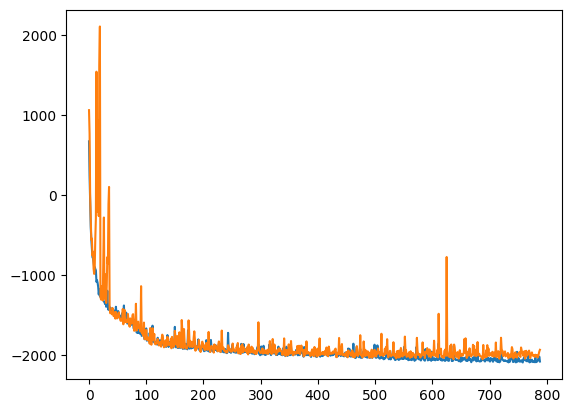

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 6.09687  validloss 6.41901±0.00000  bestvalidloss 6.41901  last_update 0
train: iter 1  trainloss 5.59938  validloss 5.86044±0.00000  bestvalidloss 5.86044  last_update 0
train: iter 2  trainloss 5.20181  validloss 5.41756±0.00000  bestvalidloss 5.41756  last_update 0
train: iter 3  trainloss 4.86845  validloss 5.04573±0.00000  bestvalidloss 5.04573  last_update 0
train: iter 4  trainloss 4.59207  validloss 4.76539±0.00000  bestvalidloss 4.76539  last_update 0
train: iter 5  trainloss 4.36134  validloss 4.50642±0.00000  bestvalidloss 4.50642  last_update 0
train: iter 6  trainloss 4.16570  validloss 4.28699±0.00000  bestvalidloss 4.28699  last_update 0
train: iter 7  trainloss 3.99661  validloss 4.08984±0.00000  bestvalidloss 4.08984  last_update 0
train: iter 8  trainloss 3.84717  validloss 3.93059±0.00000  bestvalidloss 3.93059  last_update 0
train: iter 9  trainloss 3.70799  validloss 3.79465±0.00000  bestvalidloss 3.79465  last_update 0
train: iter 10  trai

train: iter 83  trainloss -0.65844  validloss -1.09087±0.00000  bestvalidloss -1.09087  last_update 0
train: iter 84  trainloss -0.63941  validloss -1.07189±0.00000  bestvalidloss -1.09087  last_update 1
train: iter 85  trainloss -0.64901  validloss -1.11448±0.00000  bestvalidloss -1.11448  last_update 0
train: iter 86  trainloss -0.65554  validloss -1.14055±0.00000  bestvalidloss -1.14055  last_update 0
train: iter 87  trainloss -0.66118  validloss -1.10248±0.00000  bestvalidloss -1.14055  last_update 1
train: iter 88  trainloss -0.65445  validloss -1.11846±0.00000  bestvalidloss -1.14055  last_update 2
train: iter 89  trainloss -0.68511  validloss -1.13637±0.00000  bestvalidloss -1.14055  last_update 3
train: iter 90  trainloss -0.67537  validloss -1.13444±0.00000  bestvalidloss -1.14055  last_update 4
train: iter 91  trainloss -0.68107  validloss -1.17204±0.00000  bestvalidloss -1.17204  last_update 0
train: iter 92  trainloss -0.67149  validloss -1.13607±0.00000  bestvalidloss -1.1

train: iter 168  trainloss -0.69583  validloss -1.25002±0.00000  bestvalidloss -1.27777  last_update 49
train: iter 169  trainloss -0.68534  validloss -1.21312±0.00000  bestvalidloss -1.27777  last_update 50
train: iter 170  trainloss -0.66222  validloss -1.18424±0.00000  bestvalidloss -1.27777  last_update 51
train: iter 171  trainloss -0.67203  validloss -1.22251±0.00000  bestvalidloss -1.27777  last_update 52
train: iter 172  trainloss -0.68721  validloss -1.23821±0.00000  bestvalidloss -1.27777  last_update 53
train: iter 173  trainloss -0.67859  validloss -1.23796±0.00000  bestvalidloss -1.27777  last_update 54
train: iter 174  trainloss -0.66330  validloss -1.23103±0.00000  bestvalidloss -1.27777  last_update 55
train: iter 175  trainloss -0.65644  validloss -1.21617±0.00000  bestvalidloss -1.27777  last_update 56
train: iter 176  trainloss -0.70296  validloss -1.22424±0.00000  bestvalidloss -1.27777  last_update 57
train: iter 177  trainloss -0.68932  validloss -1.23622±0.00000 

train: iter 254  trainloss -0.71584  validloss -1.21116±0.00000  bestvalidloss -1.28247  last_update 43
train: iter 255  trainloss -0.67758  validloss -1.23285±0.00000  bestvalidloss -1.28247  last_update 44
train: iter 256  trainloss -0.67615  validloss -1.21546±0.00000  bestvalidloss -1.28247  last_update 45
train: iter 257  trainloss -0.69718  validloss -1.24808±0.00000  bestvalidloss -1.28247  last_update 46
train: iter 258  trainloss -0.65616  validloss -1.23088±0.00000  bestvalidloss -1.28247  last_update 47
train: iter 259  trainloss -0.69827  validloss -1.17728±0.00000  bestvalidloss -1.28247  last_update 48
train: iter 260  trainloss -0.69997  validloss -1.25267±0.00000  bestvalidloss -1.28247  last_update 49
train: iter 261  trainloss -0.67613  validloss -1.22893±0.00000  bestvalidloss -1.28247  last_update 50
train: iter 262  trainloss -0.68467  validloss -1.23012±0.00000  bestvalidloss -1.28247  last_update 51
train: iter 263  trainloss -0.66668  validloss -1.24613±0.00000 

train: iter 340  trainloss -0.68963  validloss -1.23133±0.00000  bestvalidloss -1.28301  last_update 30
train: iter 341  trainloss -0.67932  validloss -1.25521±0.00000  bestvalidloss -1.28301  last_update 31
train: iter 342  trainloss -0.65709  validloss -1.26665±0.00000  bestvalidloss -1.28301  last_update 32
train: iter 343  trainloss -0.70856  validloss -1.24307±0.00000  bestvalidloss -1.28301  last_update 33
train: iter 344  trainloss -0.67645  validloss -1.23770±0.00000  bestvalidloss -1.28301  last_update 34
train: iter 345  trainloss -0.65680  validloss -1.25384±0.00000  bestvalidloss -1.28301  last_update 35
train: iter 346  trainloss -0.69790  validloss -1.24324±0.00000  bestvalidloss -1.28301  last_update 36
train: iter 347  trainloss -0.66056  validloss -1.23094±0.00000  bestvalidloss -1.28301  last_update 37
train: iter 348  trainloss -0.69209  validloss -1.21145±0.00000  bestvalidloss -1.28301  last_update 38
train: iter 349  trainloss -0.70599  validloss -1.23029±0.00000 

train: iter 425  trainloss -0.69674  validloss -1.25576±0.00000  bestvalidloss -1.29265  last_update 53
train: iter 426  trainloss -0.65571  validloss -1.25477±0.00000  bestvalidloss -1.29265  last_update 54
train: iter 427  trainloss -0.71213  validloss -1.22783±0.00000  bestvalidloss -1.29265  last_update 55
train: iter 428  trainloss -0.66081  validloss -1.26211±0.00000  bestvalidloss -1.29265  last_update 56
train: iter 429  trainloss -0.67645  validloss -1.24845±0.00000  bestvalidloss -1.29265  last_update 57
train: iter 430  trainloss -0.68188  validloss -1.24652±0.00000  bestvalidloss -1.29265  last_update 58
train: iter 431  trainloss -0.66861  validloss -1.22117±0.00000  bestvalidloss -1.29265  last_update 59
train: iter 432  trainloss -0.67948  validloss -1.23655±0.00000  bestvalidloss -1.29265  last_update 60
train: iter 433  trainloss -0.65687  validloss -1.23246±0.00000  bestvalidloss -1.29265  last_update 61
train: iter 434  trainloss -0.67391  validloss -1.25827±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.6403, -2.5155, -3.5667, -3.4846], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 101.79769  validloss 108.85218±0.00000  bestvalidloss 108.85218  last_update 0
train: iter 1  trainloss 74.43710  validloss 86.17017±0.00000  bestvalidloss 86.17017  last_update 0
train: iter 2  trainloss 54.25235  validloss 60.77871±0.00000  bestvalidloss 60.77871  last_update 0
train: iter 3  trainloss 42.32756  validloss 46.25454±0.00000  bestvalidloss 46.25454  last_update 0
train: iter 4  trainloss 33.78776  validloss 36.72074±0.00000  bestvalidloss 36.72074  last_update 0
train: iter 5  trainloss 27.16332  validloss 29.46685±0.00000  bestvalidloss 29.46685  last_update 0
train: iter 6  trainloss 21.78824  validloss 23.98567±0.00000  bestvalidloss 23.98567  last_update 0
train: iter 7  trainloss 17.56485  validloss 19.42706±0.00000  bestvalidloss 19.42706  last_update 0
train: iter 8  trainloss 14.15065  validloss 15.83057±0.00000  bestvalidloss 15.83057  last_update 0
train: iter 9  trainloss 11.38684  validloss 12.94424±0.00000  bestvalidloss 12.94424  l

train: iter 83  trainloss 1.84023  validloss 3.08071±0.00000  bestvalidloss 3.08071  last_update 0
train: iter 84  trainloss 1.76721  validloss 3.28928±0.00000  bestvalidloss 3.08071  last_update 1
train: iter 85  trainloss 1.74978  validloss 3.44538±0.00000  bestvalidloss 3.08071  last_update 2
train: iter 86  trainloss 1.79661  validloss 3.50831±0.00000  bestvalidloss 3.08071  last_update 3
train: iter 87  trainloss 1.77506  validloss 3.43880±0.00000  bestvalidloss 3.08071  last_update 4
train: iter 88  trainloss 1.79906  validloss 3.35720±0.00000  bestvalidloss 3.08071  last_update 5
train: iter 89  trainloss 1.77502  validloss 3.31375±0.00000  bestvalidloss 3.08071  last_update 6
train: iter 90  trainloss 1.79176  validloss 3.53544±0.00000  bestvalidloss 3.08071  last_update 7
train: iter 91  trainloss 1.77860  validloss 3.39907±0.00000  bestvalidloss 3.08071  last_update 8
train: iter 92  trainloss 1.75737  validloss 3.29450±0.00000  bestvalidloss 3.08071  last_update 9
train: ite

train: iter 166  trainloss 1.71083  validloss 3.38444±0.00000  bestvalidloss 3.03513  last_update 21
train: iter 167  trainloss 1.74694  validloss 3.50611±0.00000  bestvalidloss 3.03513  last_update 22
train: iter 168  trainloss 1.74397  validloss 3.50712±0.00000  bestvalidloss 3.03513  last_update 23
train: iter 169  trainloss 1.73333  validloss 3.29350±0.00000  bestvalidloss 3.03513  last_update 24
train: iter 170  trainloss 1.71515  validloss 3.17848±0.00000  bestvalidloss 3.03513  last_update 25
train: iter 171  trainloss 1.72059  validloss 3.60106±0.00000  bestvalidloss 3.03513  last_update 26
train: iter 172  trainloss 1.73276  validloss 3.30557±0.00000  bestvalidloss 3.03513  last_update 27
train: iter 173  trainloss 1.75734  validloss 3.17268±0.00000  bestvalidloss 3.03513  last_update 28
train: iter 174  trainloss 1.72862  validloss 3.33411±0.00000  bestvalidloss 3.03513  last_update 29
train: iter 175  trainloss 1.73509  validloss 3.15598±0.00000  bestvalidloss 3.03513  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-11.2071)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(5.7558)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.4708520232769516
tensor([2.6833])
